### K-Means

In [68]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (9, 5)

import warnings
warnings.simplefilter('ignore')
from sklearn.decomposition import PCA

from kneed import KneeLocator
from sklearn.cluster import KMeans,DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch

In [2]:
#loading the preprocessed database.
#Loading the dataset
df=pd.read_csv('delays_prep2.csv', index_col=False, warn_bad_lines=True, error_bad_lines=False)
df = df.sample(frac =.2).reset_index()
df=df.drop(['index','Unnamed: 0'], axis=1)
df.head()

,UniqueCarrier,CRSElapsedTime,Origin,Dest,DepDelay,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay,DepTime_sin,DepTime_cos,Month_sin,Month_cos,DayOfWeek_sin,DayOfWeek_cos
0,0.069018,0.067187,0.006775,0.000602,0.292793,0.79029,0.0,0.000000,0.0,0.00000,0.495495,-0.673013,0.739631,-0.866025,0.500000,0.000000,1.000000
1,0.098349,0.187500,0.065106,0.036044,0.941942,0.00000,0.0,0.831832,0.0,0.97047,0.925425,-0.495459,0.868632,-0.866025,-0.500000,-0.781831,0.623490
2,0.015387,0.193750,0.039302,0.031479,0.615616,0.00000,0.0,0.831832,0.0,0.00000,0.495495,-0.484046,0.875042,0.500000,-0.866025,0.000000,1.000000
3,0.193752,0.070312,0.010158,0.002002,0.292793,0.79029,0.0,0.000000,0.0,0.00000,0.347848,-0.695913,0.718126,0.500000,0.866025,0.433884,-0.900969
4,0.015387,0.195312,0.039302,0.008477,0.292793,0.00000,0.0,0.000000,0.0,0.00000,0.347848,-0.619094,0.785317,0.500000,-0.866025,0.974928,-0.222521


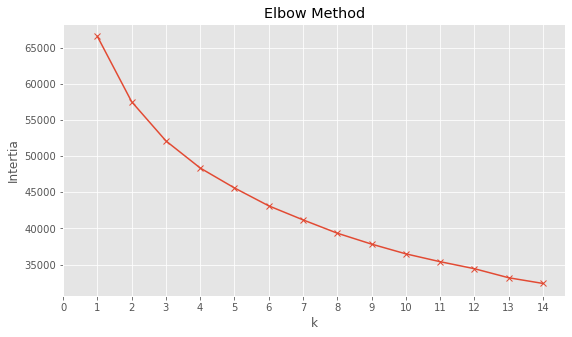

In [36]:
intertia = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    intertia.append(km.inertia_)
plt.plot(K, intertia, marker= "x")
plt.xlabel('k')
plt.xticks(np.arange(15))
plt.ylabel('Intertia')
plt.title('Elbow Method')
plt.show()

In [34]:
colze = KneeLocator(range(1, 15), intertia, curve="convex", direction="decreasing")
print('Ideal cluster number is:', colze.elbow)

Ideal cluster number is: 5


##### Implementing K-means Algorithm

In [48]:
# Perform K-means algorithm

km = KMeans(n_clusters=5,random_state = 42, n_init= km.n_iter_, init='random')
kfit=km.fit(df)
y_kmeans = km.predict(df)

centroids = km.cluster_centers_
C = km.cluster_centers_


In [44]:
#Appending the identified clusters to the original data

pca = PCA(n_components=2)
ppcc=pca.fit_transform(df)

principalDf = pd.DataFrame(data = ppcc, columns = ['component1', 'component2'])

principalDf['Cluster'] = y_kmeans
principalDf.head()


,component1,component2,Cluster
0,-0.327109,-1.004749,2
1,-1.168628,-0.336835,0
2,-1.281004,0.052270,0
3,-0.173927,-0.994348,3
4,-1.211766,0.218501,0


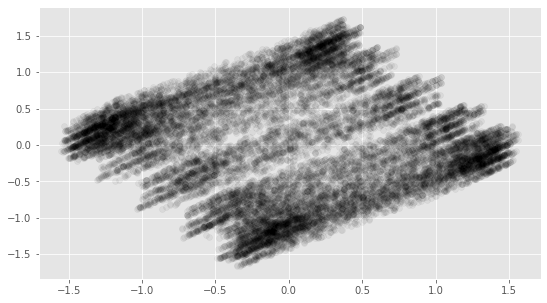

In [45]:
plt.scatter(principalDf['component1'], principalDf['component2'], alpha=.05, color='black')

##### Plotting our Clusters and Centroids

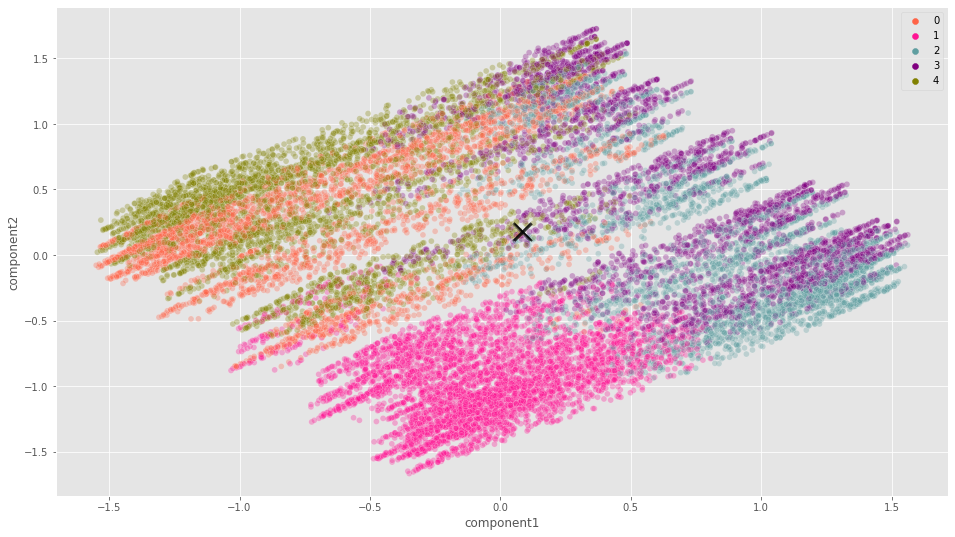

In [49]:
plt.rcParams['figure.figsize'] = (16, 9)

# Predicting the clusters
labels = km.predict(df)

colores=['tomato','deeppink','cadetblue','purple','olive']
#,'deeppink','sienna','tomato','darkcyan','cadetblue','purple','olive'
asignar=[]
for row in labels:
    asignar.append(colores[row])

sns.scatterplot(data=principalDf, x="component1", y="component2", hue= y_kmeans, palette = colores, alpha = 0.3)
centers = km.cluster_centers_# Plot centers

plt.scatter(centers[:, 0], centers[:, 1],color='k', s=300, marker="x", alpha = 0.5);


In [65]:
from sklearn import metrics
labels = km.labels_
sil=metrics.silhouette_score(df, labels, metric = 'euclidean')
if sil < 0:
    print('silhouette:',round(sil,4),'-- samplea have been assigned to the wrong cluster')
elif sil < 0.5:
    print('silhouette:',round(sil,4),'-- overlaping samples')
else:
    print('silhouette:',round(sil,4),'-- good clustering')

silhouette: 0.1268 -- overlaping samples


In [51]:
#CH score
print ('CH Score:',metrics.calinski_harabasz_score(df, labels))

CH Score: 2227.143786117033


<br><br><br>

### AgglomerativeClustering

In [79]:
model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
model.fit(df)
labels = model.labels_

In [70]:
labels

array([0, 2, 2, ..., 3, 1, 4])

In [76]:
#Appending the identified clusters to the original data

pca = PCA(n_components=2)
ppcc=pca.fit_transform(df)

aggdf = pd.DataFrame(data = ppcc, columns = ['component1', 'component2'])

aggdf['Cluster'] = labels
aggdf.head()

,component1,component2,Cluster
0,-0.327109,-1.004749,1
1,-1.168628,-0.336835,0
2,-1.281004,0.052270,0
3,-0.173927,-0.994348,1
4,-1.211766,0.218501,4


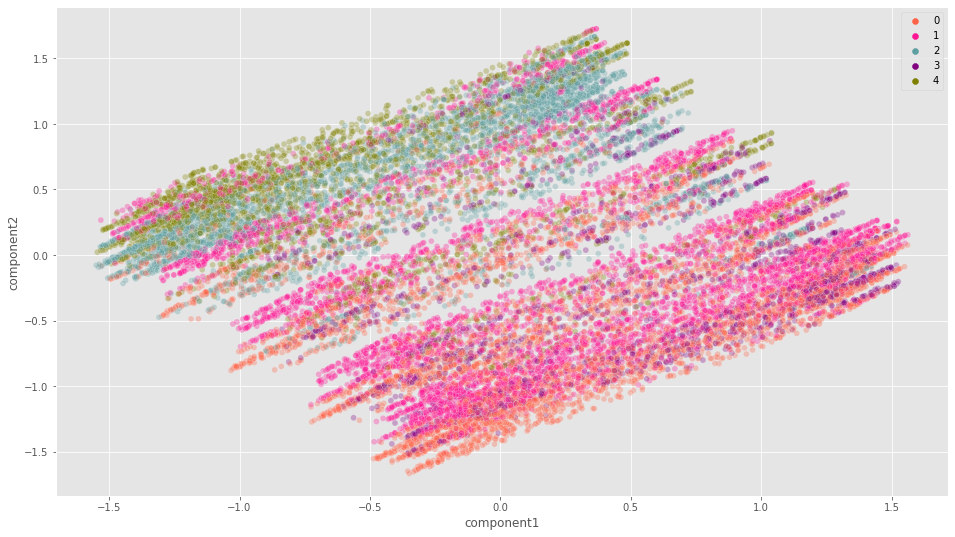

In [81]:
plt.rcParams['figure.figsize'] = (16, 9)


colores=['tomato','deeppink','cadetblue','purple','olive']
#,'deeppink','sienna','tomato','darkcyan','cadetblue','purple','olive'
asignar=[]
for row in labels:
    asignar.append(colores[row])

sns.scatterplot(data=aggdf, x="component1", y="component2", hue= labels, palette = colores, alpha = 0.3)


In [82]:
sil=metrics.silhouette_score(df, labels, metric = 'euclidean')
if sil < 0:
    print('silhouette:',round(sil,4),'-- samplea have been assigned to the wrong cluster')
elif sil < 0.5:
    print('silhouette:',round(sil,4),'-- overlaping samples')
else:
    print('silhouette:',round(sil,4),'-- good clustering')

silhouette: 0.0691 -- overlaping samples
